In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data = np.genfromtxt('gravdata.txt', unpack=True)
x_vals = data[0]
d_vals = data[1]
z_vals = np.arange(0, 100, 1)

In [53]:
# construct G matrix:

G_matrix = np.zeros((len(x_vals), len(z_vals)))
G=1

for x in range(len(x_vals)):
    for z in range(len(z_vals)):

        G_matrix[x,z] = G*np.log(((z_vals[z]+1)**2 + x_vals[x]**2)/(z_vals[z]**2 + x_vals[x]**2))



In [54]:
prod = G_matrix.T @ G_matrix
np.shape(prod)

(100, 100)

In [55]:
def m_est (matrix,d, eps):
    
    G_prod = matrix.T @ matrix
    id = np.eye(len(z_vals))
    m_est = np.linalg.inv(G_prod + eps**2 * id) @ matrix.T @ d

    return m_est


In [56]:
estimate = m_est(G_matrix, d_vals ,1e-4)

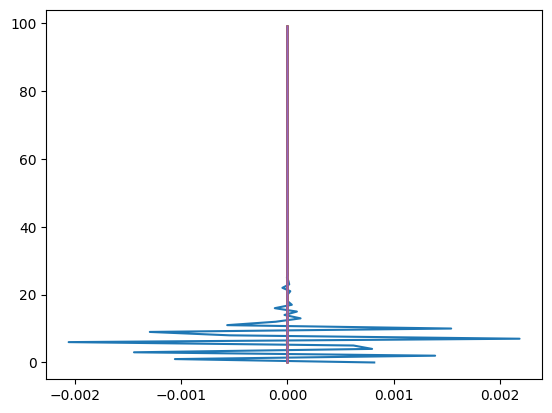

In [57]:
epsilon= [1e-7, 1e-6, 1e-4, 1e-3, 1e-2]
for e in epsilon:
    estimate = m_est(G_matrix, d_vals ,e)
    plt.plot(estimate, z_vals)